In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [3]:
data = pd.read_csv('dataset/rainfall_india_2017.csv').rename(columns=str.lower)
data.head(3)

,subdivision,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,annual
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4


## The Columns and Their Corresponding Data Types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subdivision  4188 non-null   object 
 1   year         4188 non-null   int64  
 2   jan          4184 non-null   float64
 3   feb          4185 non-null   float64
 4   mar          4182 non-null   float64
 5   apr          4184 non-null   float64
 6   may          4185 non-null   float64
 7   jun          4183 non-null   float64
 8   jul          4181 non-null   float64
 9   aug          4184 non-null   float64
 10  sep          4182 non-null   float64
 11  oct          4181 non-null   float64
 12  nov          4177 non-null   float64
 13  dec          4178 non-null   float64
 14  annual       4162 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 490.9+ KB


In [5]:
data.shape

(4188, 15)

## Summary of the data 

Find unique Values And Find Missing Value

In [6]:
print('Dataset comprises of {} observation and {} Characteristics'.format(data.shape[0],data.shape[1]))
print('\n Unique Values: ',data.nunique())
print('\n Missing Values: ',data.isna().sum())

Dataset comprises of 4188 observation and 15 Characteristics

 Unique Values:  subdivision      36
year            117
jan             808
feb             902
mar             989
apr            1247
may            1751
jun            2754
jul            3093
aug            2950
sep            2664
oct            1958
nov            1245
dec             810
annual         3770
dtype: int64

 Missing Values:  subdivision     0
year            0
jan             4
feb             3
mar             6
apr             4
may             3
jun             5
jul             7
aug             4
sep             6
oct             7
nov            11
dec            10
annual         26
dtype: int64


## Transpose the Data

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4188.0,1959.220630,33.717097,1901.0,1930.000,1959.00,1988.000,2017.0
jan,4184.0,18.938337,33.793128,0.0,0.600,5.95,22.000,583.7
feb,4185.0,21.599427,35.731734,0.0,0.500,6.50,26.600,403.5
mar,4182.0,27.412912,46.927963,0.0,1.000,7.90,31.375,605.6
apr,4184.0,43.071845,68.150985,0.0,3.000,15.45,49.650,595.1
may,4185.0,85.660860,122.695137,0.0,8.600,36.90,97.800,1168.6
jun,4183.0,230.117475,234.292087,0.4,70.800,138.80,305.000,1609.9
jul,4181.0,347.020043,268.850702,0.0,175.600,285.00,418.500,2362.8
aug,4184.0,289.742185,188.426071,0.0,155.850,258.50,377.625,1664.6
sep,4182.0,197.316332,135.547646,0.1,100.400,173.70,266.125,1222.0


## Checking The Length Of The Year,Starting Year & Ending Year 

In [8]:
len(data['year'].unique()), data['year'].min(), data['year'].max()

(117, 1901, 2017)

## Filling Missing Values With 0

In [9]:
data.fillna(0, inplace=True)

In [10]:
data.isna().sum()

subdivision    0
year           0
jan            0
feb            0
mar            0
apr            0
may            0
jun            0
jul            0
aug            0
sep            0
oct            0
nov            0
dec            0
annual         0
dtype: int64

## Constructing Histogram Of The Data

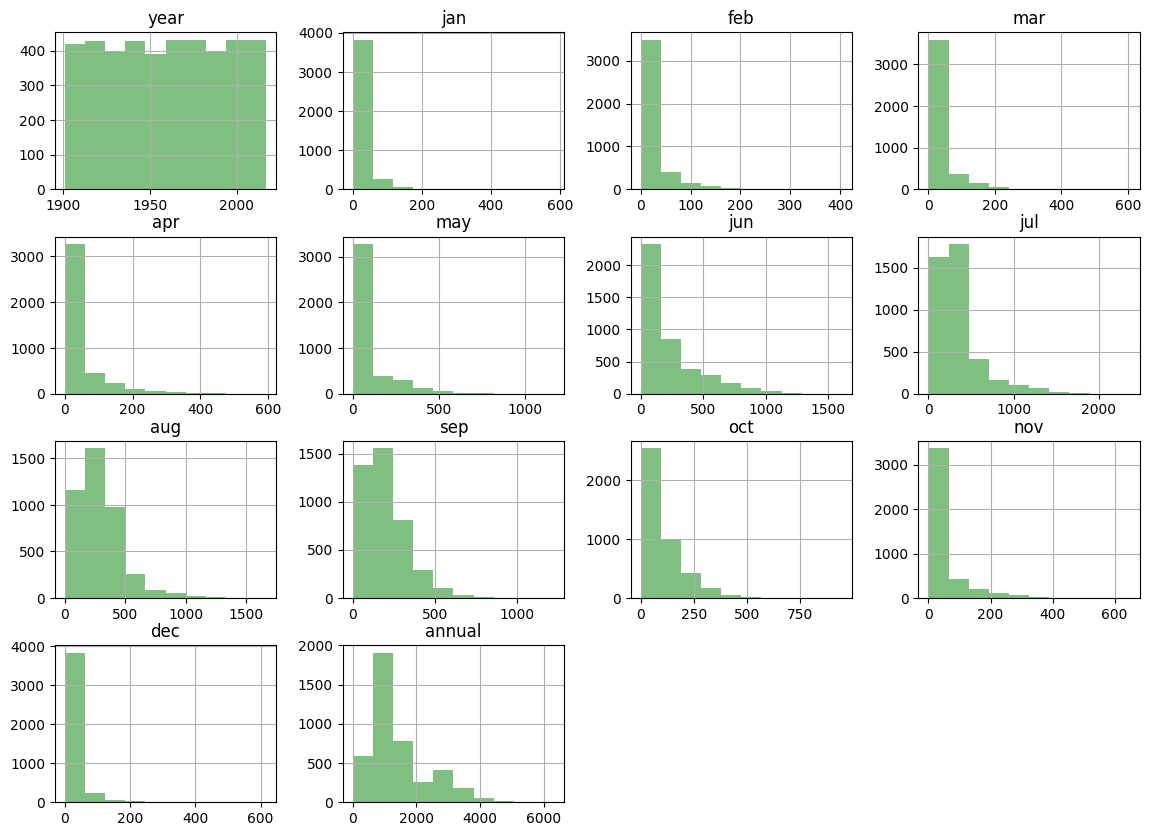

In [11]:
data.hist(figsize=(14,10),color='g',alpha=0.5,grid=True);

## Demonstrating Annual Rainfall Of The 117 Years

Text(0, 0.5, 'Rainfall in mm')

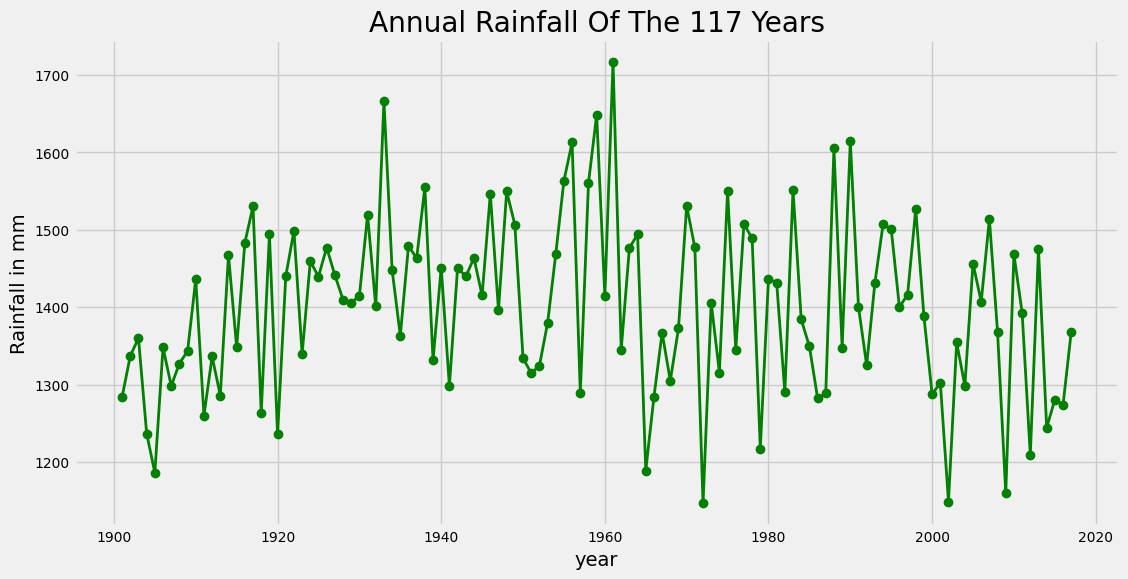

In [12]:
plt.style.use('fivethirtyeight')
data.groupby('year')['annual'].mean().plot(title = 'Annual Rainfall Of The 117 Years',
                                           kind='line', 
                                           figsize=(12,6),
                                             linewidth=2, 
                                             fontsize=10,
                                               color='g',
                                               marker='o',)
plt.ylabel('Rainfall in mm')

- From above graph we can see that highest Rainfall recorded in 1961 
     

## Monthaly Rainfall Of All Years

Text(0, 0.5, 'Rainfall in mm')

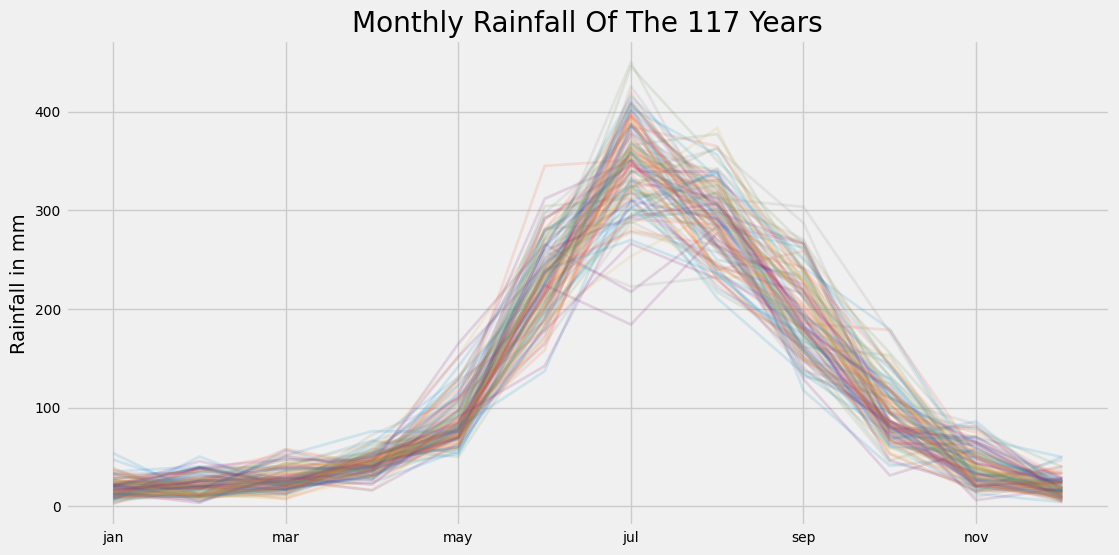

In [13]:
data.drop(['annual','subdivision'],axis=1).groupby('year').mean().T.plot(title='Monthly Rainfall Of The 117 Years',
                                                                         figsize=(12,6),linewidth=2,fontsize=10,
                                                                         alpha=0.140,grid=True,legend=False)
                                                                         
plt.ylabel('Rainfall in mm')

 From the above graph we see that the most rainfalling month is july (jun-aug). Monsoon or rainy season, lasting from June to September. The season is dominated by the humid southwest summer monsoon, which slowly sweeps across the country beginning in late May or early June. Monsoon rains begin to recede from North India at the beginning of October. South India typically receives more rainfall.

## Annaul rainfall Of  All Subdivision

C:\Users\Akshat\AppData\Local\Temp\ipykernel_7688\2289201288.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


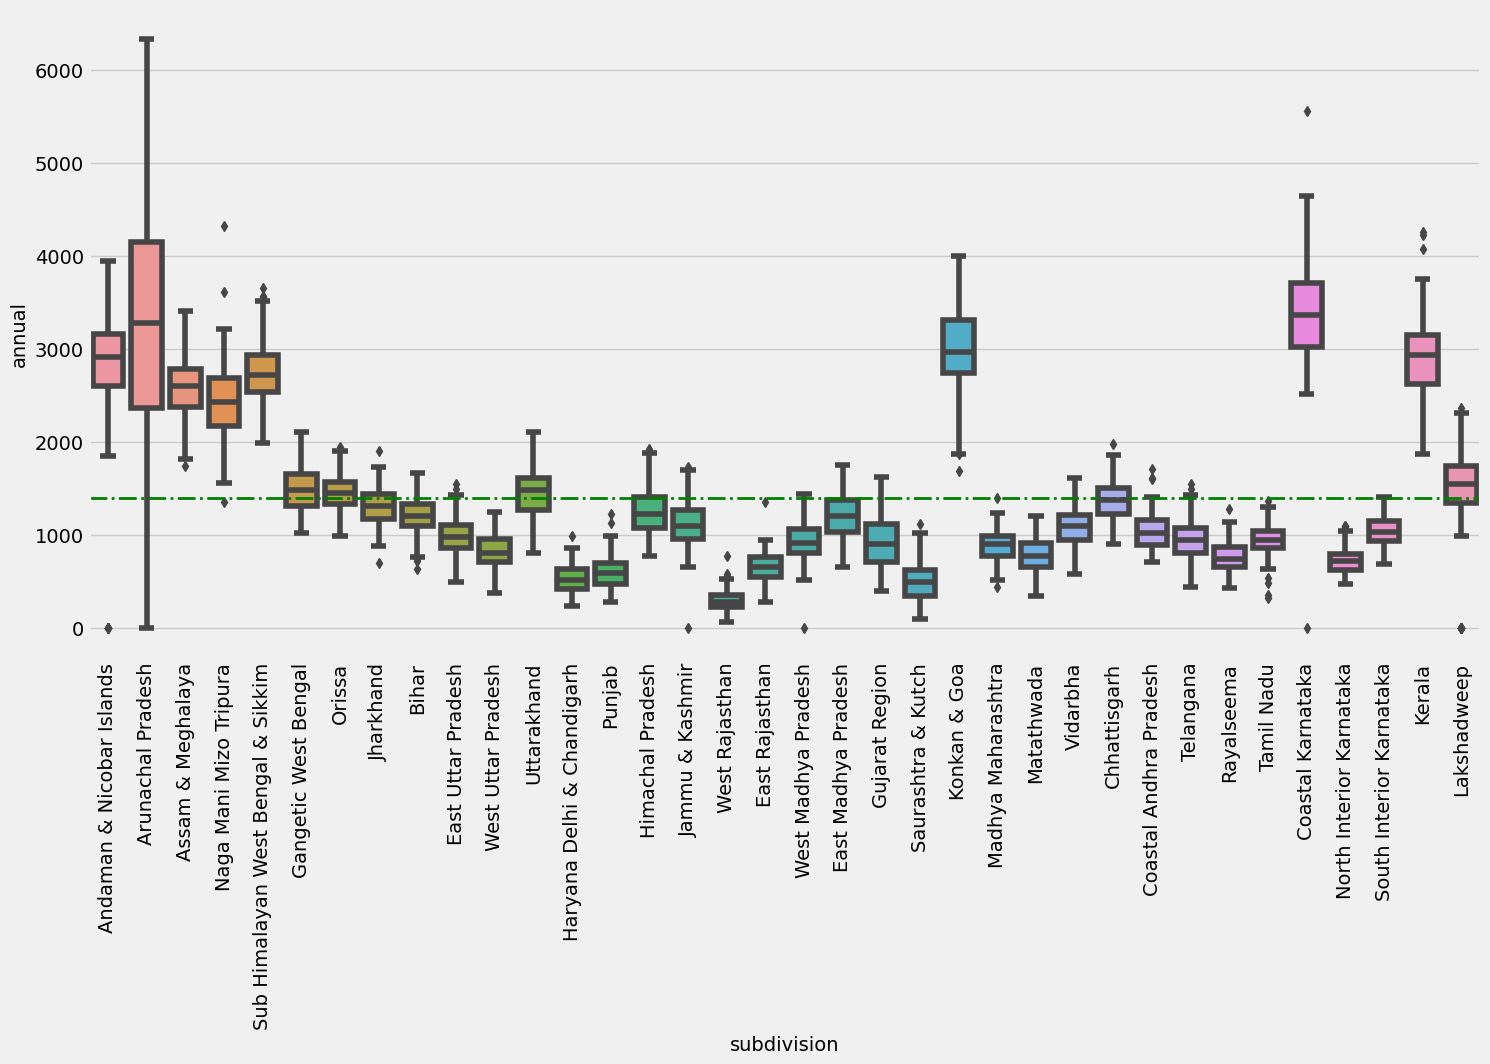

In [14]:
plt.style.use('seaborn-colorblind')
fig = plt.figure(figsize=(16,8))
plt.xticks(rotation='vertical')
ax = sns.boxplot(x='subdivision',y='annual',data=data);
ax.axhline(data['annual'].mean(),color='g',linestyle='-.',linewidth=2)

 - From the above plot we can se that the highest rainfall recorded in Arunachal Pradesh & the lowest is West Rajasthan meteorological subdivision.

### Now We See Top Most Three Highest And Lowest Rainfall With There Metrological Subdivision.

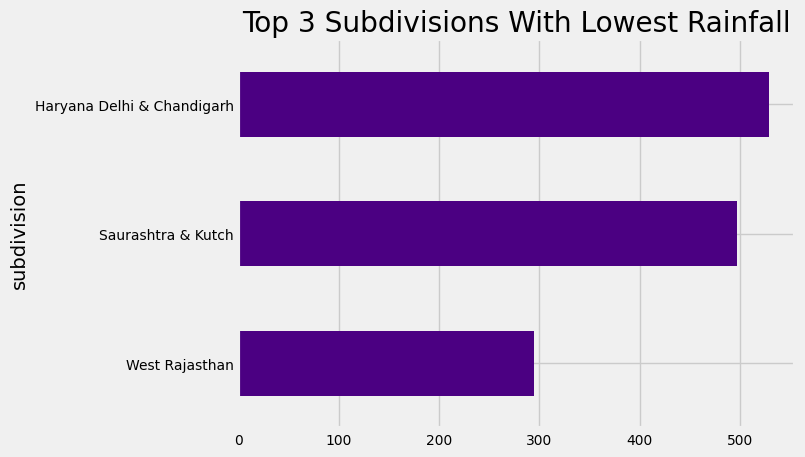

In [15]:
data.groupby('subdivision')[['annual']].mean().sort_values('annual').head(3).plot.barh(title='Top 3 Subdivisions With Lowest Rainfall'
                                                                                     ,color='indigo',fontsize=10,legend = False);

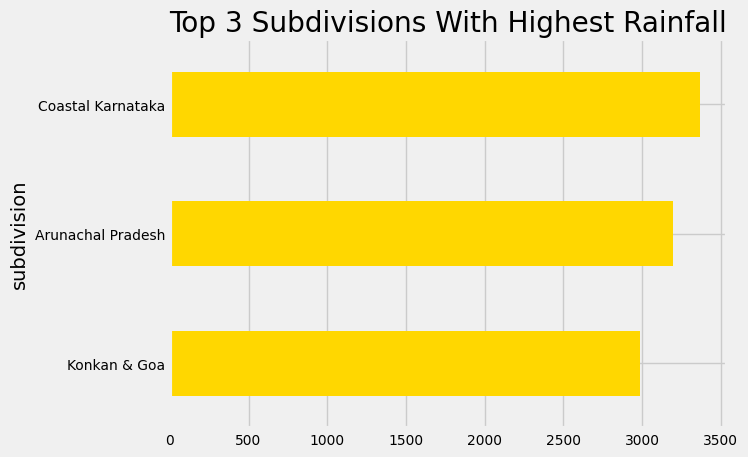

In [16]:
data.groupby('subdivision')[['annual']].mean().sort_values('annual').tail(3).plot.barh(title='Top 3 Subdivisions With Highest Rainfall'
                                                                                     ,color='gold',fontsize=10,legend = False);

- Now We See The Top And Bottom Rainfalls year With There Rainfalling Value In Millimeter 


In [17]:
li = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul','aug', 'sep', 'oct', 'nov', 'dec']
h = data.drop(li,axis=1).dropna().sort_values('annual').head(1).values.tolist()
l = data.drop(li,axis=1).dropna().sort_values('annual').tail(1).values.tolist()
print('\nThe highest {} millimeter rainfall happens in {} & the year of {}. '.format(l[0][2],l[0][0],l[0][1]))
print('\nThe lowest {} millimeter rainfall happens in {} & the year of {}. '.format(h[0][2],h[0][0],h[0][1]))




The highest 6331.1 millimeter rainfall happens in Arunachal Pradesh & the year of 1948. 

The lowest 0.0 millimeter rainfall happens in Andaman & Nicobar Islands & the year of 1932. 


## Monthaly Rainfalls of All Subdivision

C:\Users\Akshat\AppData\Local\Temp\ipykernel_7688\3930851375.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


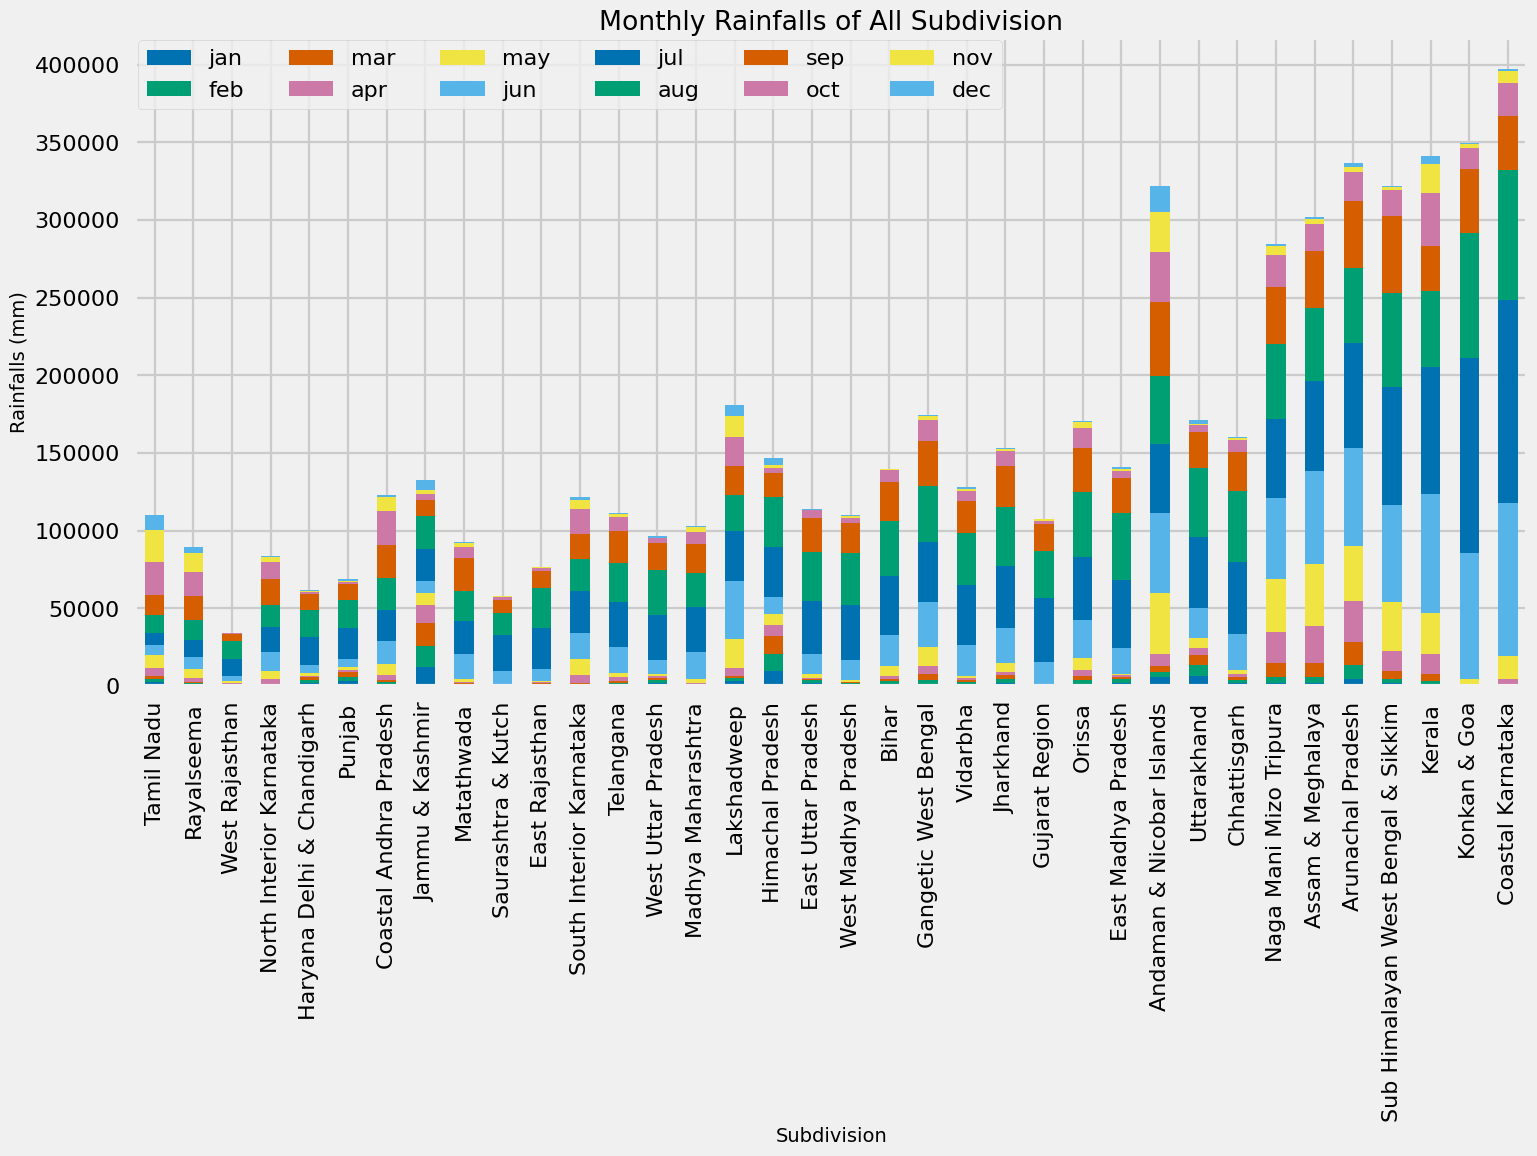

In [18]:
plt.style.use('seaborn-poster')
ax = data.drop(['annual','year'],axis=1).groupby('subdivision').sum().sort_values('jul').plot.bar(stacked=True,figsize=(16, 8),
                                                                               title='Monthly Rainfalls of All Subdivision')
ax.set_xlabel('Subdivision')
ax.set_ylabel('Rainfalls (mm)')
patches, labels = ax.get_legend_handles_labels()    
ax.legend(patches, labels, loc='upper left',ncol=6,borderaxespad=.1)
plt.show();

From the abhove graph shows that majority of rainfall is received in the month of Jun-Sep which is the Monsoon season or rainy season

## Rainfall of 10 years Average of The 117 years

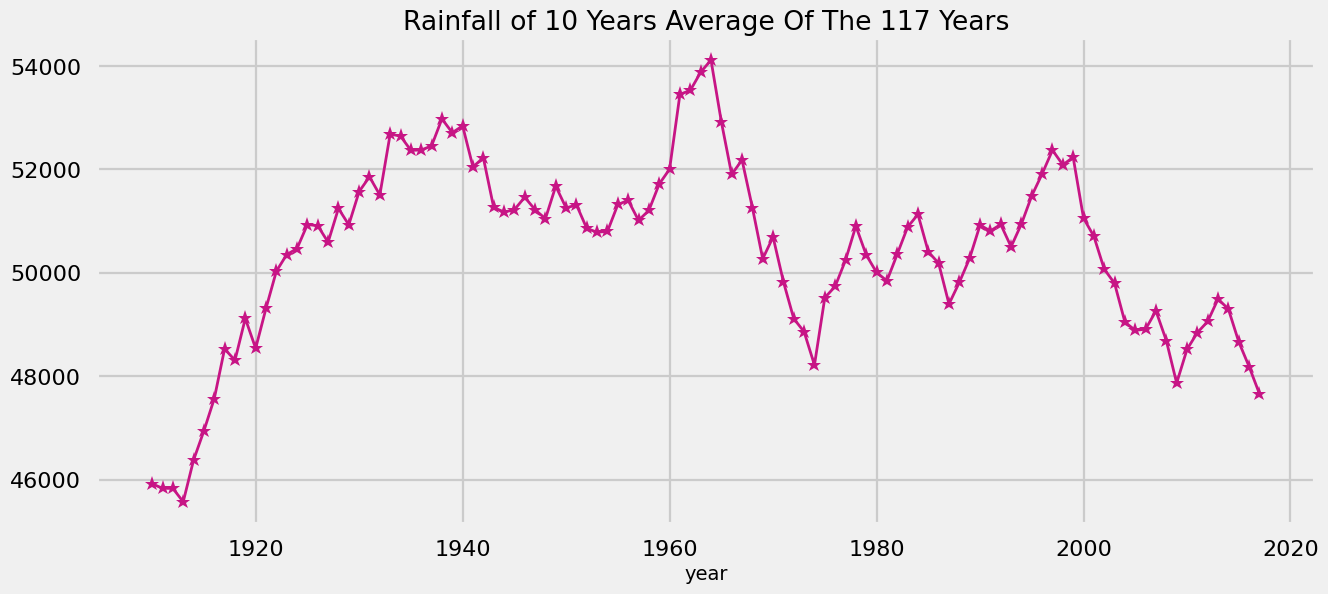

In [19]:
data.groupby('year')['annual'].sum().rolling(10).mean().plot(title='Rainfall of 10 Years Average Of The 117 Years'
                                                             ,figsize=(14,6),
                                                             linewidth=2,c='mediumvioletred',
                                                             marker='*');

## SubDivision Wise Rainfall

In [20]:
colors = ['aqua', 'black',  'brown', 'chartreuse', 'coral', 'cyan', 'darkblue','darkgreen', 'fuchsia','gold', 'goldenrod', 'green', 'grey',
          'indigo', 'khaki', 'lightblue', 'lightgreen', 'lime', 'magenta', 'maroon', 'navy', 'olive', 'orange','orangered', 'orchid', 'plum',
          'purple', 'salmon', 'sienna', 'silver', 'tan', 'teal', 'tomato', 'turquoise', 'violet', 'wheat', 'yellow','yellowgreen']

C:\Users\Akshat\AppData\Local\Temp\ipykernel_7688\194285589.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
C:\Users\Akshat\AppData\Local\Temp\ipykernel_7688\194285589.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


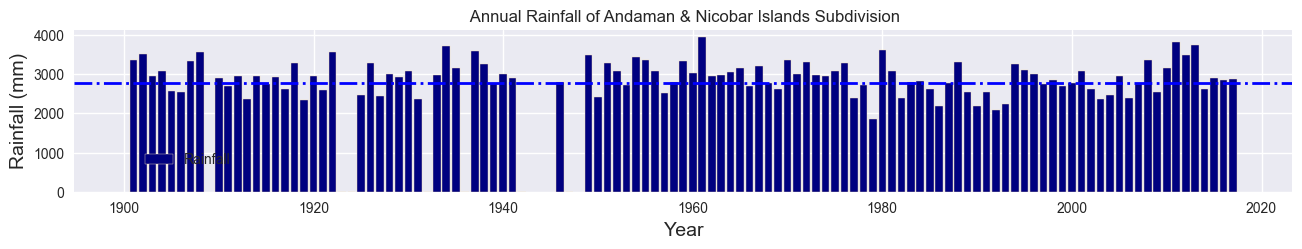

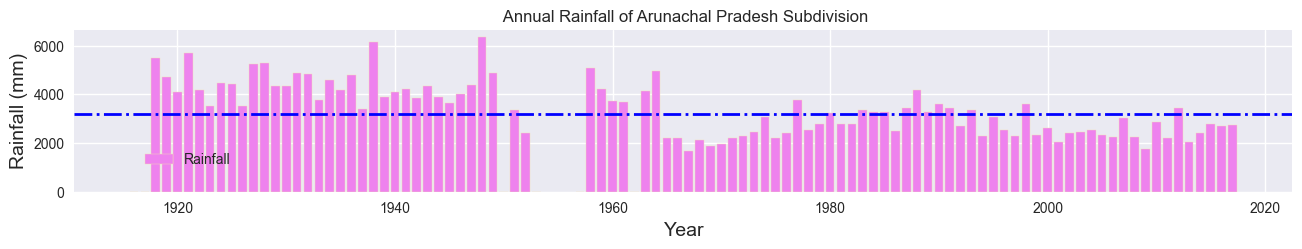

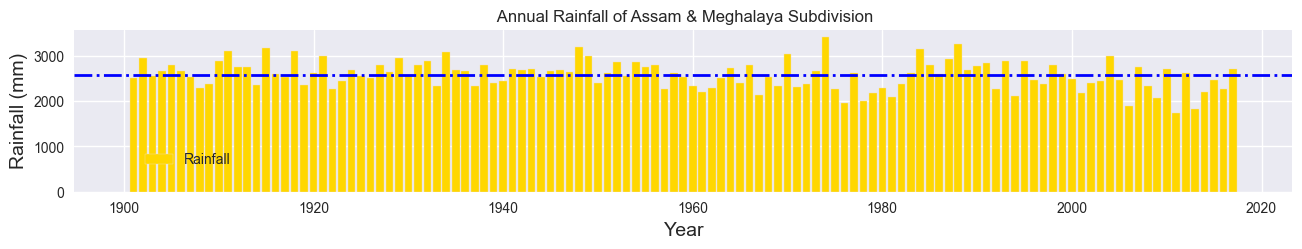

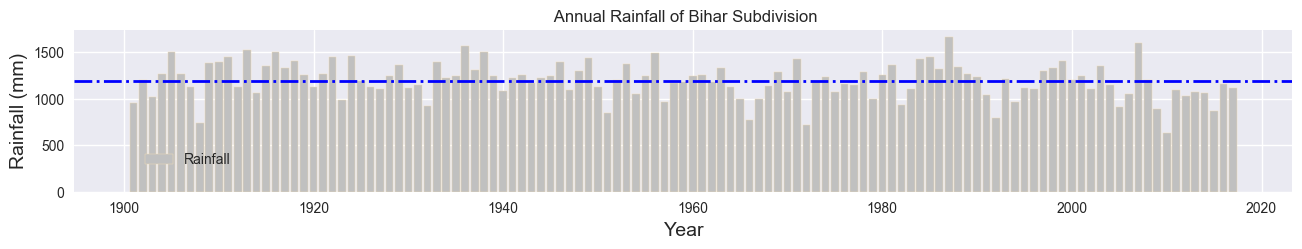

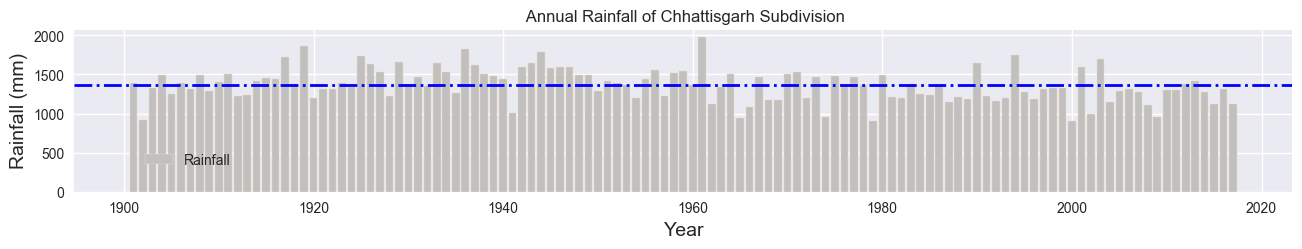

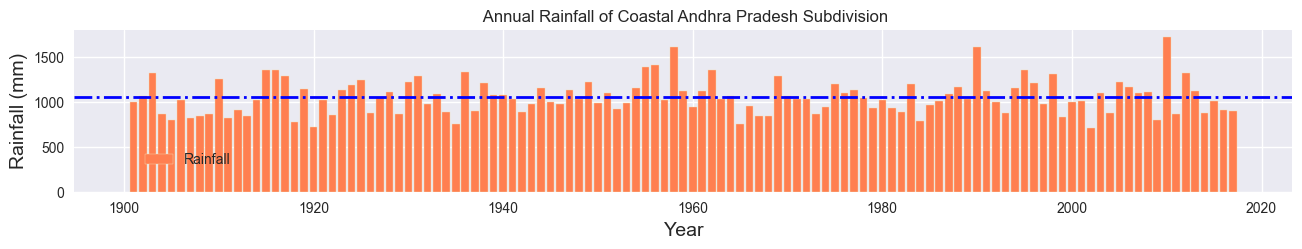

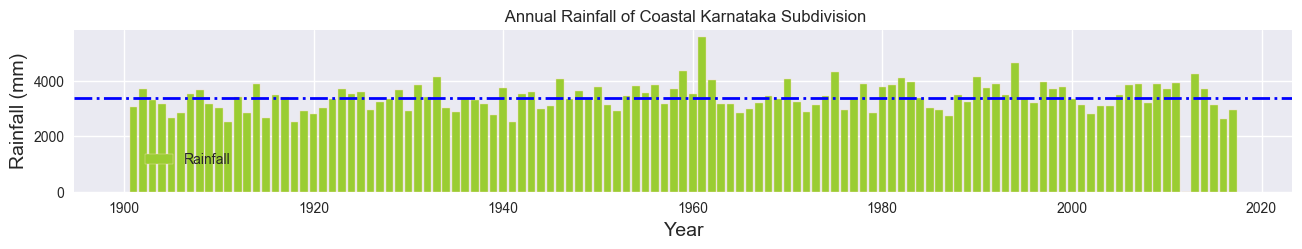

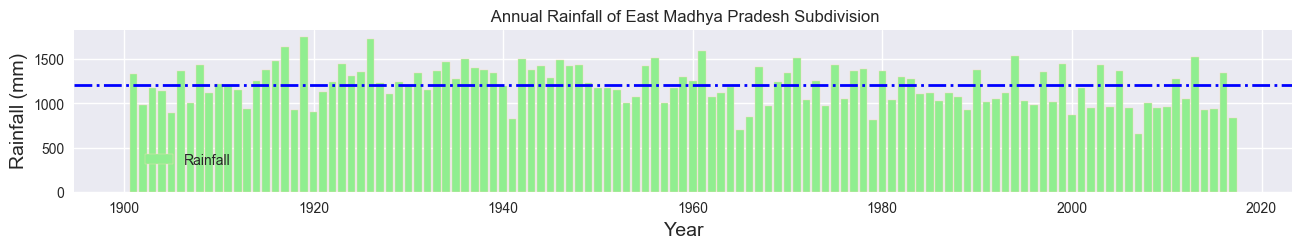

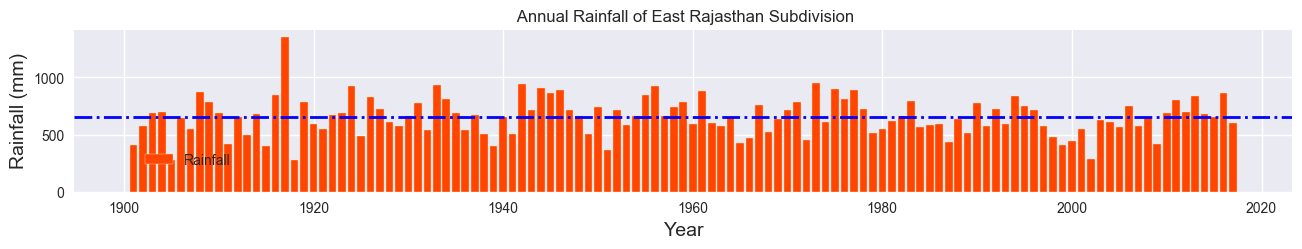

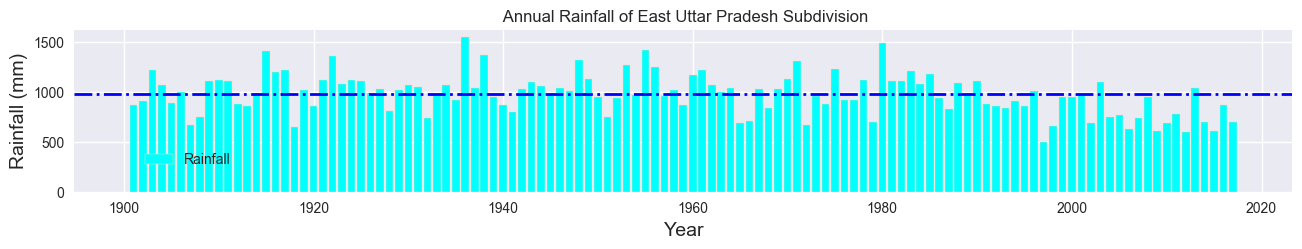

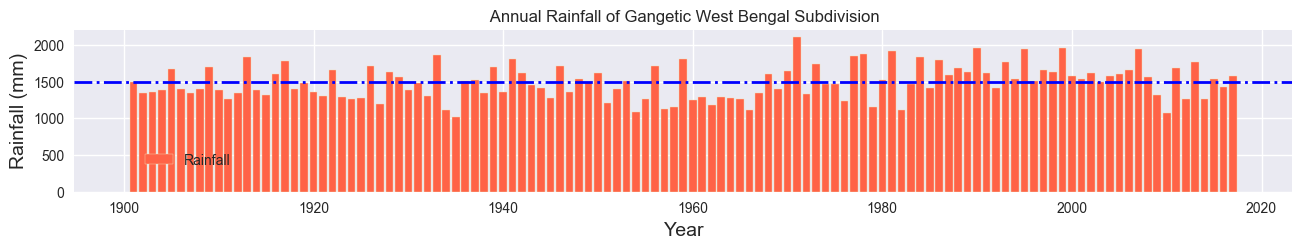

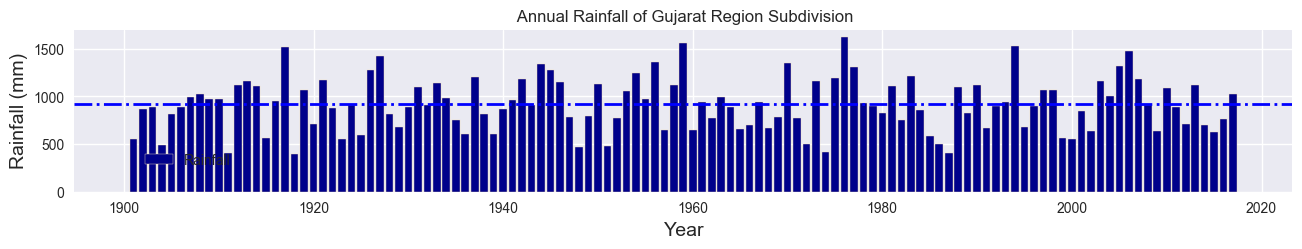

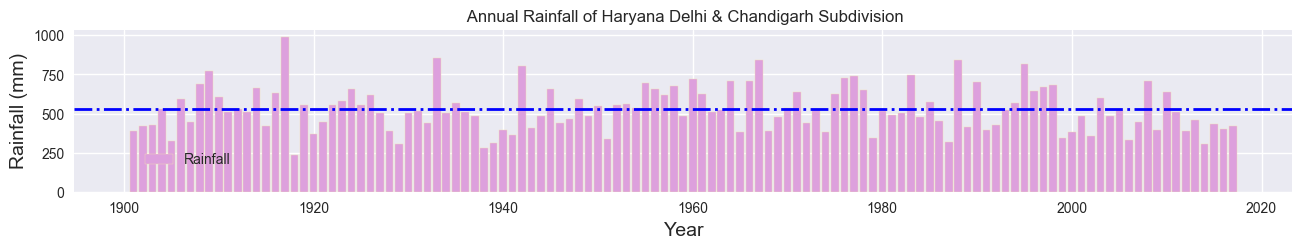

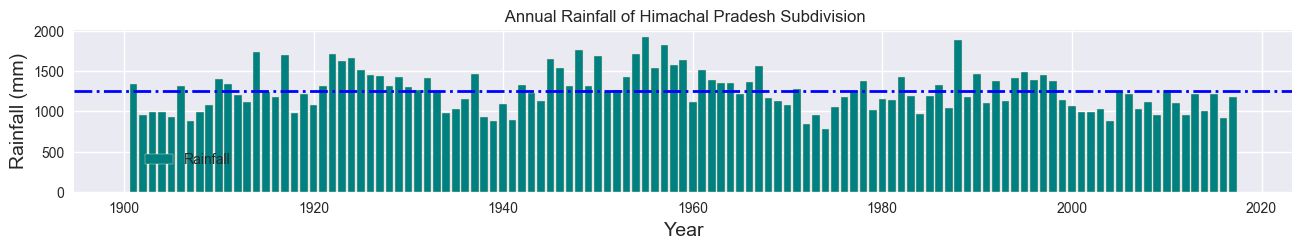

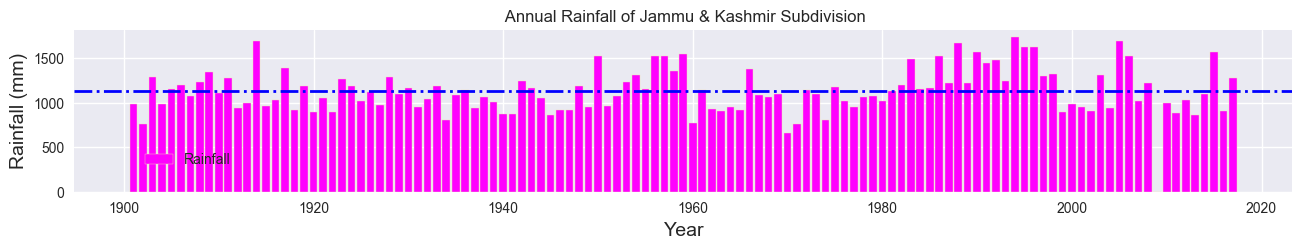

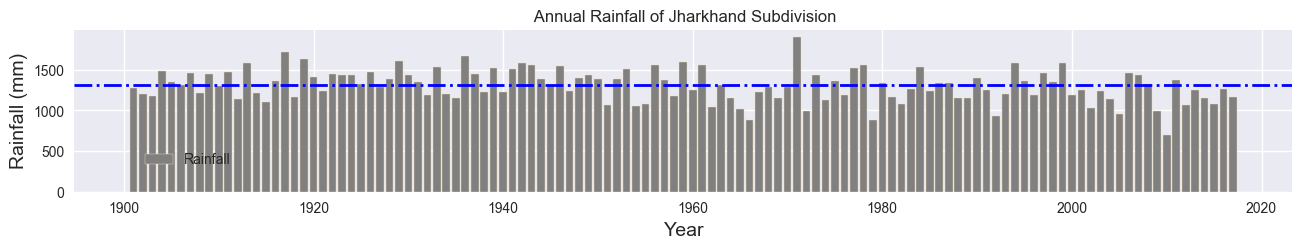

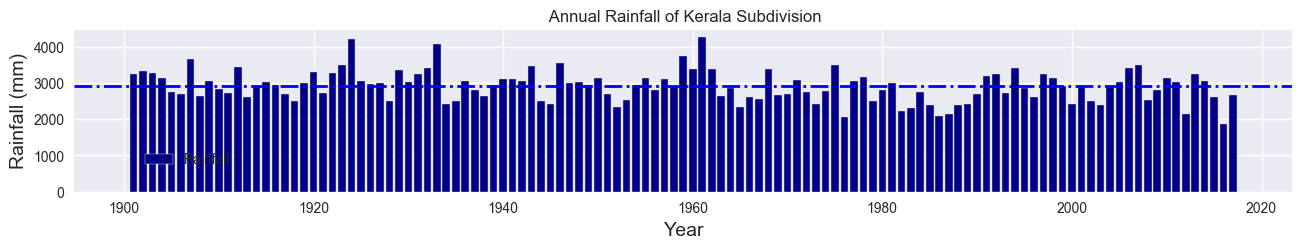

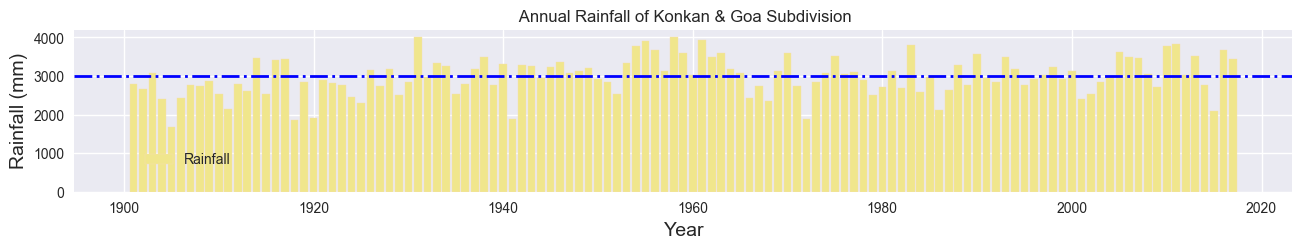

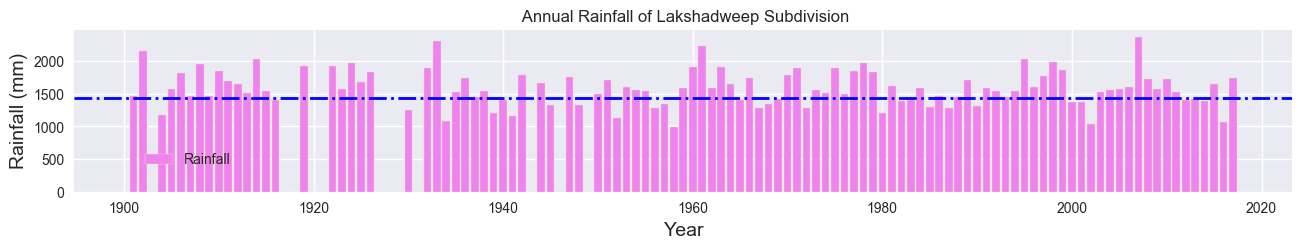

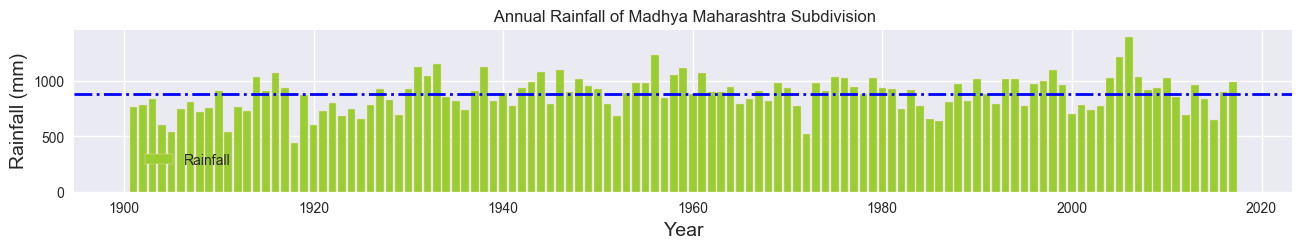

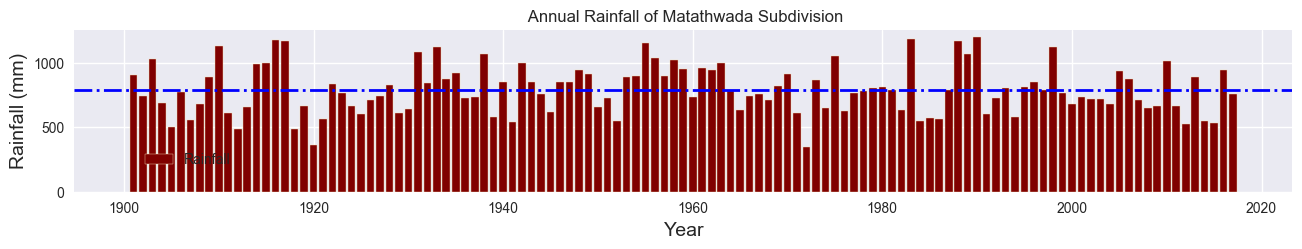

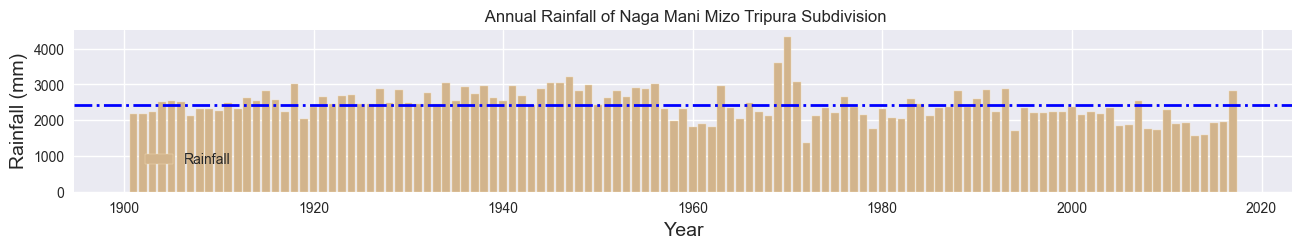

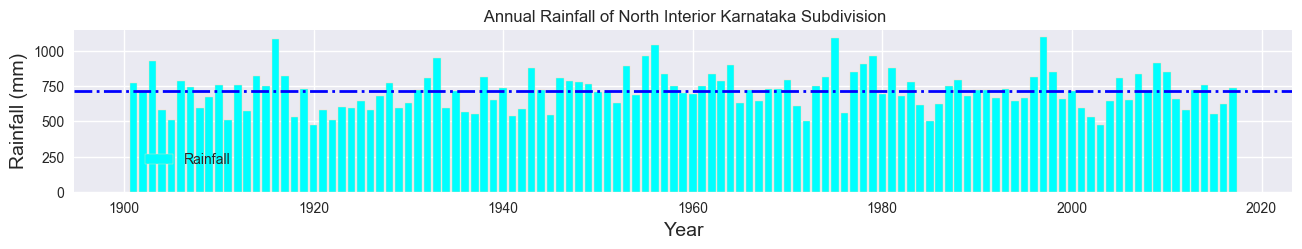

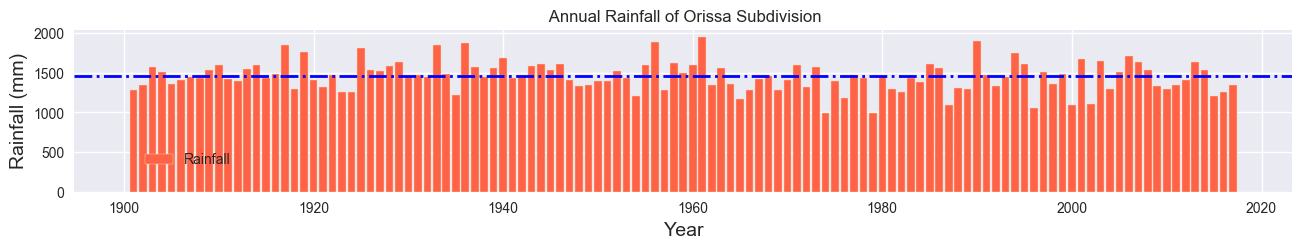

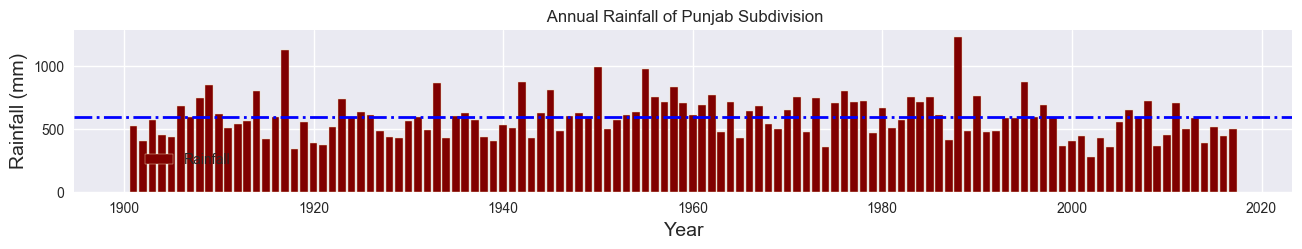

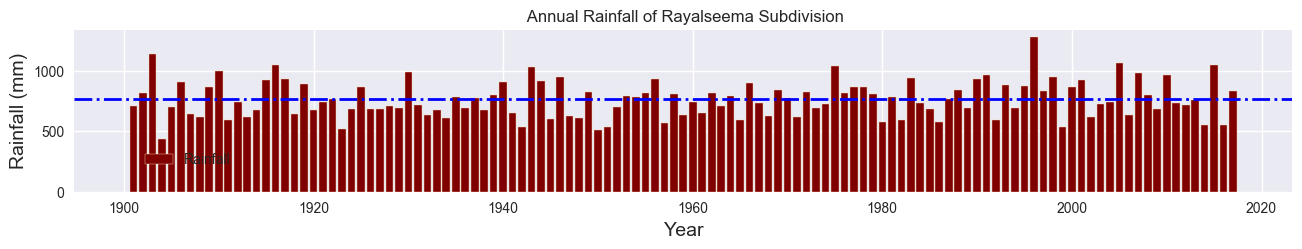

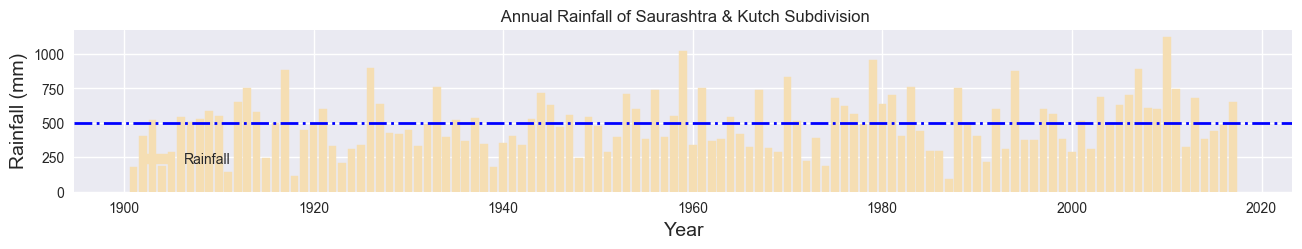

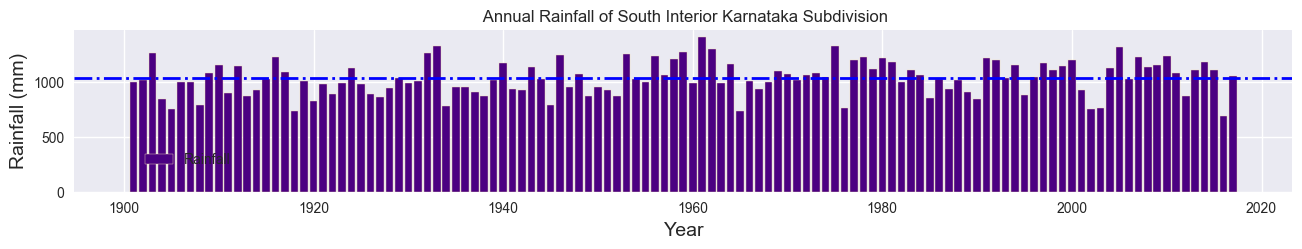

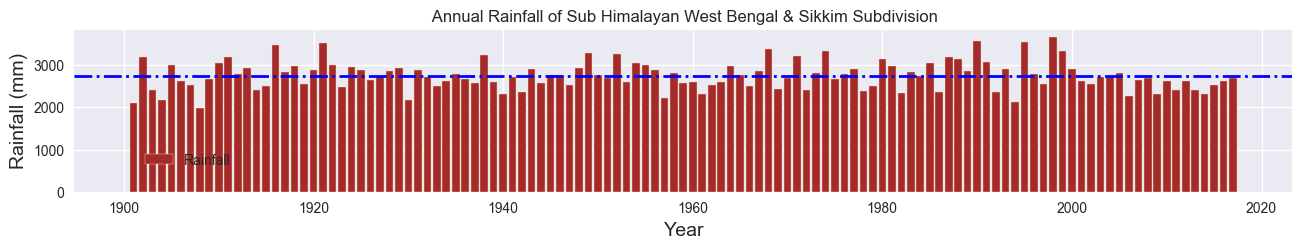

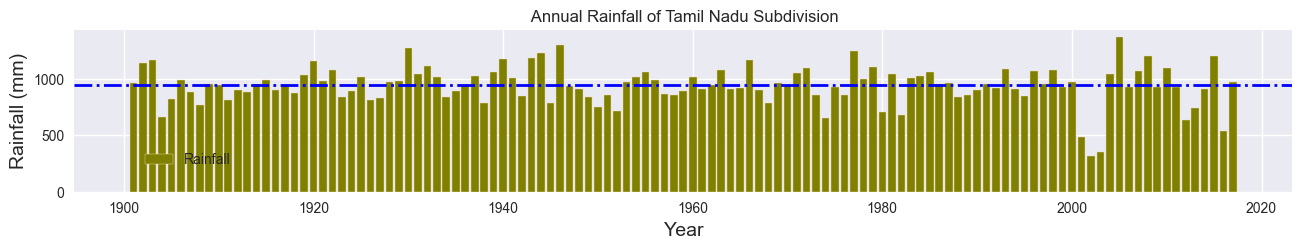

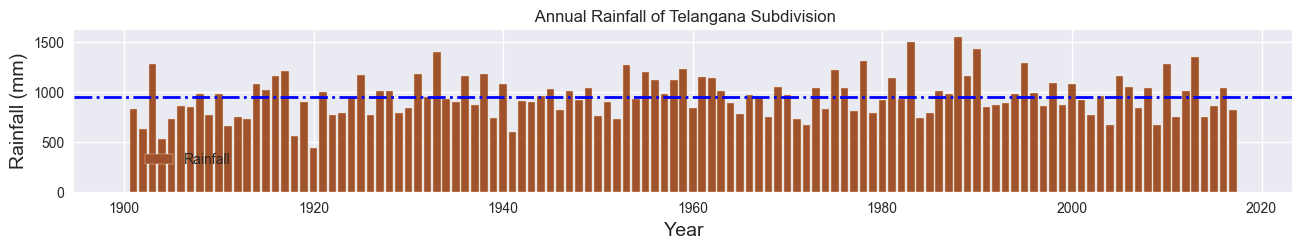

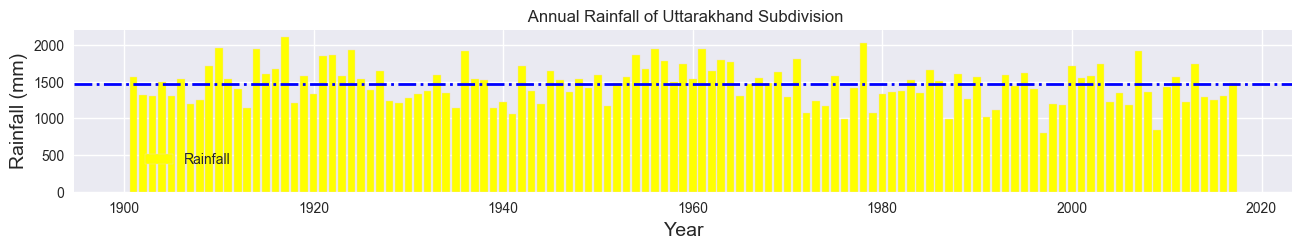

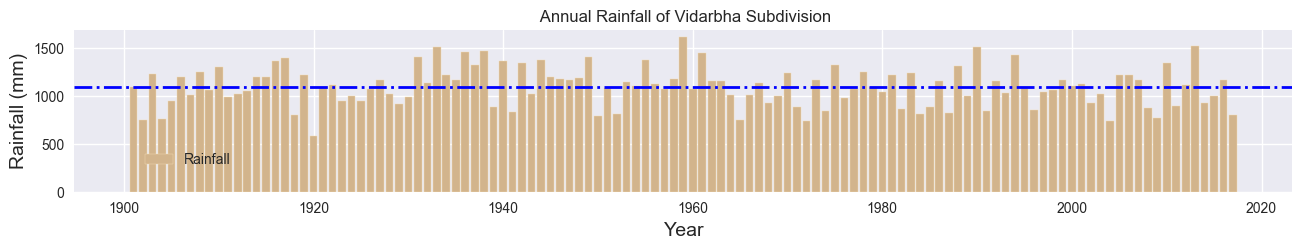

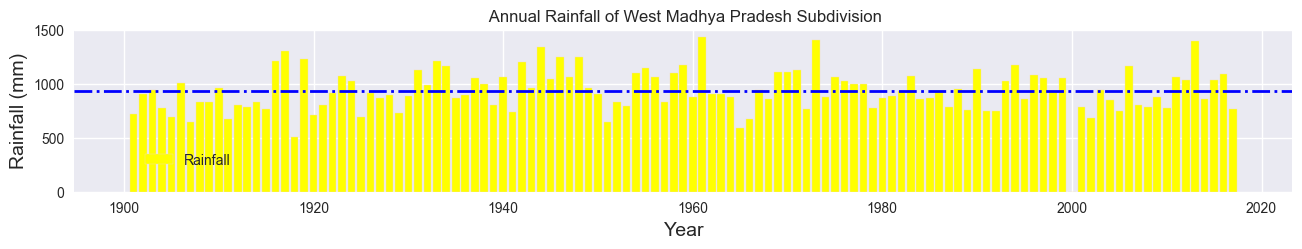

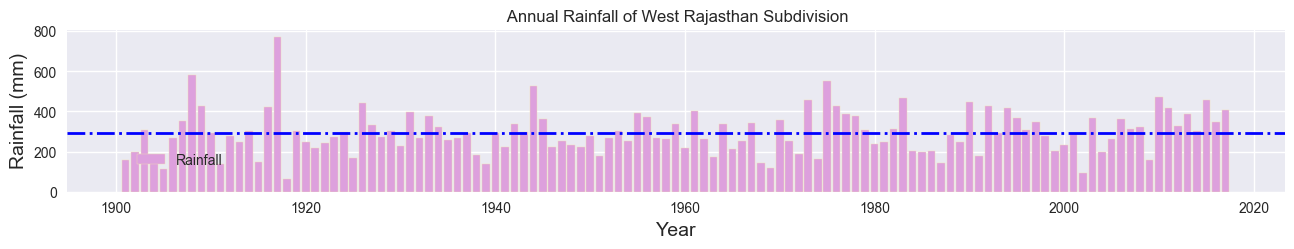

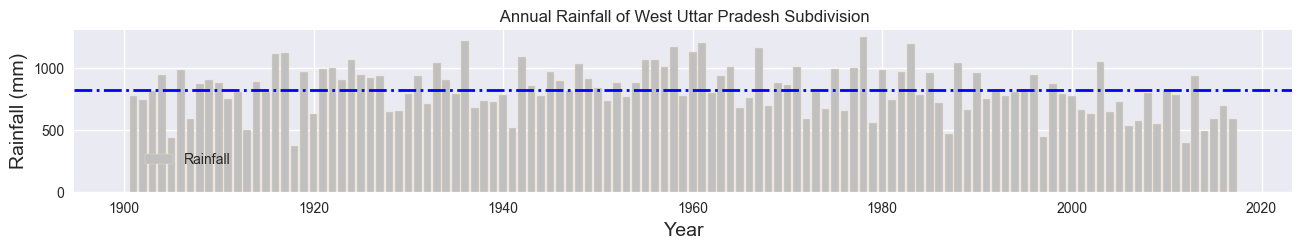

In [21]:
rfs = sorted(set(data["subdivision"].to_list()))
plt.style.use('seaborn')
plt.style.use('seaborn-pastel')

for sub in rfs:
    fig, ax = plt.subplots(figsize=(14,2))
    rainfalls= data[data.subdivision == sub]
    ax.bar(rainfalls['year'],rainfalls['annual'],color=random.choice(colors),
                 edgecolor='wheat',label='Rainfall')
    
    ax.axhline(rainfalls['annual'].mean(),linestyle='-.',linewidth=2,color='b')
    ax.set(title=' Annual Rainfall of '+sub+' Subdivision',xlabel='Year',ylabel='Rainfall (mm)',)
    patches, labels = ax.get_legend_handles_labels()
    ax.legend(patches, labels, loc='upper left',bbox_to_anchor=(0.05, 0., 0.5, 0.3),borderaxespad=.3)
    plt.savefig('images/'+sub+'.png',bbox_inches='tight')

In [25]:
import plotly.express as px

In [28]:
data.head()

,subdivision,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,annual
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7
